In [ ]:
import pandas as pd
from googleapiclient.discovery import build

In [ ]:
API_KEY = 'API KEY'

def get_trending_videos(api_key, max_results=200):
  #building youtube services
  youtube = build('youtube', 'v3', developerKey=api_key)

  #initializing the list to hold videos details
  videos = []

  #fetch the most popular videos
  request = youtube.videos().list(
      part = 'snippet, contentDetails, statistics',
      chart = 'mostPopular',
      regionCode='US',
      maxResults=50
  )

  # paginate through the results if max_results > 50
  while request and len(videos) < max_results:
        response = request.execute()
        for item in response['items']:
            video_details = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption': item['contentDetails'].get('caption', 'false'),
                'view_count': item['statistics'].get('viewCount', 0),
                'like_count': item['statistics'].get('likeCount', 0),
                'dislike_count': item['statistics'].get('dislikeCount', 0),
                'favorite_count': item['statistics'].get('favoriteCount', 0),
                'comment_count': item['statistics'].get('commentCount', 0)
            }
            videos.append(video_details)

        #get the next page token
        request = youtube.videos().list_next(request, response)

  return videos[:max_results]

def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def main():
    trending_videos = get_trending_videos(API_KEY)
    filename = 'trending_videos.csv'
    save_to_csv(trending_videos, filename) # Call the function with the correct name
    print(f'Trending videos saved to {filename}')


if __name__ == '__main__':
      main()


Trending videos saved to trending_videos.csv


*The code uses the YouTube Data API to get details about the top 200 trending videos in the US.
It gathers information like the video title, description, publication date, channel details, tags,
duration, quality, captions, and engagement metrics (views, likes, and comments). This data is
compiled into a list, converted into a pandas DataFrame, and then saved as a CSV file called
trending_videos.csv. This allows for analyzing trends and patterns in the trending video data.*


In [ ]:
import pandas as pd
get_trending_videos = pd.read_csv('trending_videos.csv')
get_trending_videos.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,RXeOiIDNNek,WWDC 2024 — June 10 | Apple,Watch the WWDC24 keynote introducing Apple Int...,2024-06-10T18:52:24Z,UCE_M8A5yxnLfW0KghEeajjw,Apple,28,"['Apple', 'Apple Event', 'Apple Keynote', 'App...",PT1H43M37S,hd,True,7705911,231608,0,0,0
1,-PYzMqhu3Fs,Destiny 2 | The Journey Ahead,"Venture forth, Guardians. Join us as we look a...",2024-06-10T15:00:07Z,UC52XYgEExV9VG6Rt-6vnzVA,Destiny 2,20,"['Destiny', 'destiny 2', 'xbox', 'playstation'...",PT5M42S,hd,True,830917,36792,0,0,3400
2,y1-w1kUGuz8,Kalki 2898 AD Trailer - Telugu | Prabhas | Ami...,Kalki 2898 AD Trailer - Telugu | Prabhas | Ami...,2024-06-10T13:45:08Z,UC70pKToywlxOGdgIvz8gYqA,Vyjayanthi Network,1,"['Kalki 2898 AD Trailer', 'kalki 2898 ad', 'ka...",PT3M3S,hd,True,12466025,676739,0,0,25102
3,u5h4fv-0oiA,DELETE TOXICITY = 5 LEGENDARY STARR DROPS!,#ThumbsUpForBrawl is the newest Brawl Stars co...,2024-06-10T08:00:05Z,UCooVYzDxdwTtGYAkcPmOgOw,Brawl Stars,20,"['brawl stars', 'mobile game', 'mobile rpg', '...",PT2M20S,hd,True,10582262,1073805,0,0,47236
4,LtIWE4CCX5M,18 things from WWDC24 | Apple,Here’s your guide to the big announcements fro...,2024-06-10T18:56:21Z,UCE_M8A5yxnLfW0KghEeajjw,Apple,28,"['Apple', 'Apple Intelligence', 'AI', 'privacy...",PT2M51S,hd,True,1730542,56443,0,0,0


In [ ]:
import pandas as pd

# Loading the trending videos from the CSV file
trending_videos_df = pd.read_csv('trending_videos.csv')

# Checking for missing values
missing_values = trending_videos_df.isnull().sum()

# Displaying data types
data_types = trending_videos_df.dtypes

missing_values, data_types

(video_id          0
 title             0
 description       0
 published_at      0
 channel_id        0
 channel_title     0
 category_id       0
 tags              0
 duration          0
 definition        0
 caption           0
 view_count        0
 like_count        0
 dislike_count     0
 favorite_count    0
 comment_count     0
 dtype: int64,
 video_id          object
 title             object
 description       object
 published_at      object
 channel_id        object
 channel_title     object
 category_id        int64
 tags              object
 duration          object
 definition        object
 caption             bool
 view_count         int64
 like_count         int64
 dislike_count      int64
 favorite_count     int64
 comment_count      int64
 dtype: object)

*No missing values. The data types seem appropriate for most columns, but we may need to convert the published_at column to a datetime format and tags might need further  processing.*

In [ ]:
#converting 'published_at' to datetime
trending_videos_df['published_at'] = pd.to_datetime(trending_videos_df['published_at'])

# converting tags from string representation of list to actual list
trending_videos_df['tags'] = trending_videos_df['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)


In [ ]:
#descriptive statistics
descriptive_stats = trending_videos_df[['view_count', 'like_count', 'dislike_count', 'comment_count']].describe()
descriptive_stats

,view_count,like_count,dislike_count,comment_count
count,2.000000e+02,2.000000e+02,200.0,200.000000
mean,3.100343e+06,1.282878e+05,0.0,7462.595000
std,1.021851e+07,4.896395e+05,0.0,27006.298655
min,6.441700e+04,1.141000e+03,0.0,0.000000
25%,4.250095e+05,1.556500e+04,0.0,1053.500000
50%,8.504865e+05,3.650300e+04,0.0,2280.000000
75%,2.014907e+06,7.917975e+04,0.0,5340.750000
max,1.194674e+08,5.845870e+06,0.0,309594.000000


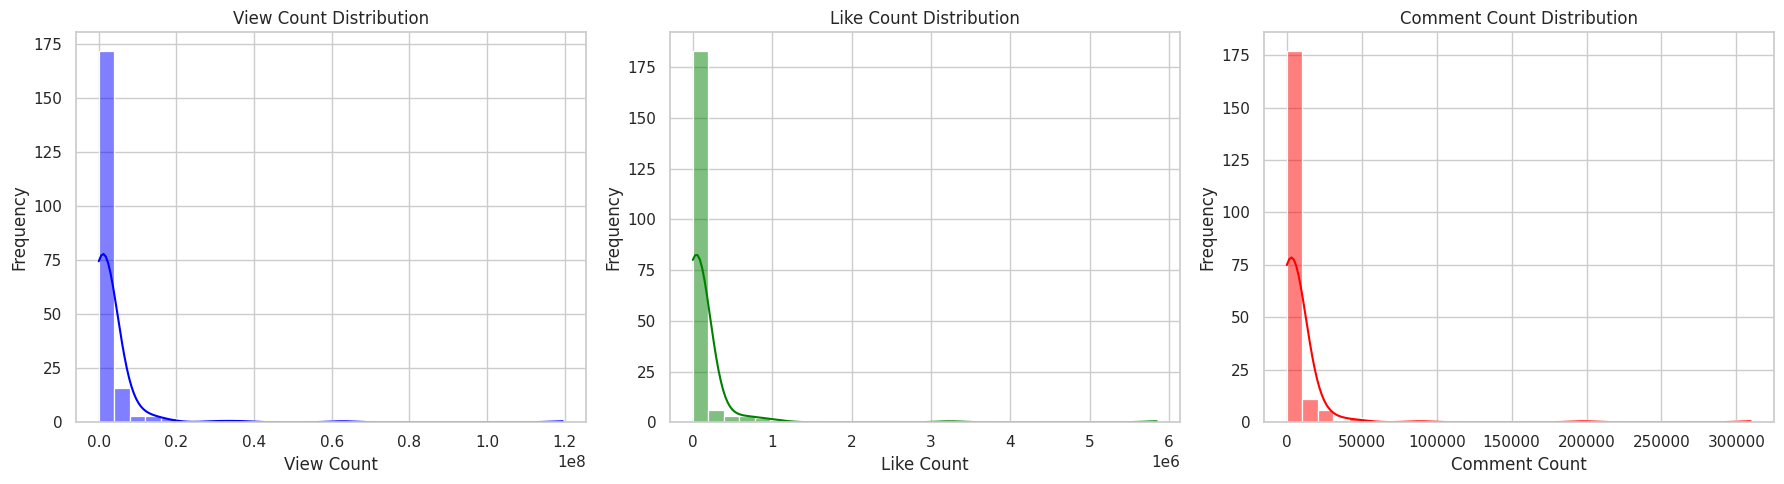

In [ ]:
#distribution views, likes and comment of all videoa in the data

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# view count distribution
sns.histplot(trending_videos_df['view_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

# like count distribution
sns.histplot(trending_videos_df['like_count'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

# comment count distribution
sns.histplot(trending_videos_df['comment_count'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

*The histograms show that the distributions of view counts, like counts, and comment counts are right-skewed, with most videos having lower counts and a few videos having very high counts.*

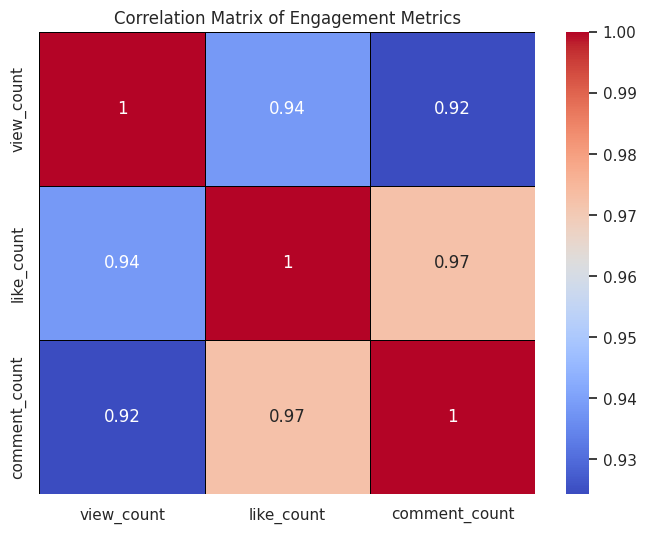

In [ ]:
# correlation matrix
correlation_matrix = trending_videos_df[['view_count', 'like_count', 'comment_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

In [ ]:
#as we collected the category id of the video and not the category name.
#So we will collect  the category names as well to analyze the categories of the trending videos.

from googleapiclient.discovery import build

API_KEY = 'API KEY'
youtube = build('youtube', 'v3', developerKey=API_KEY)

def get_category_mapping():
    request = youtube.videoCategories().list(
        part='snippet',
        regionCode='US'
    )
    response = request.execute()
    category_mapping = {}
    for item in response['items']:
        category_id = int(item['id'])
        category_name = item['snippet']['title']
        category_mapping[category_id] = category_name
    return category_mapping

# get the category mapping
category_mapping = get_category_mapping()
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


<ipython-input-36-0a8e832d2379>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=trending_videos_df['category_name'], order = trending_videos_df['category_name'].value_counts().index, palette='viridis')


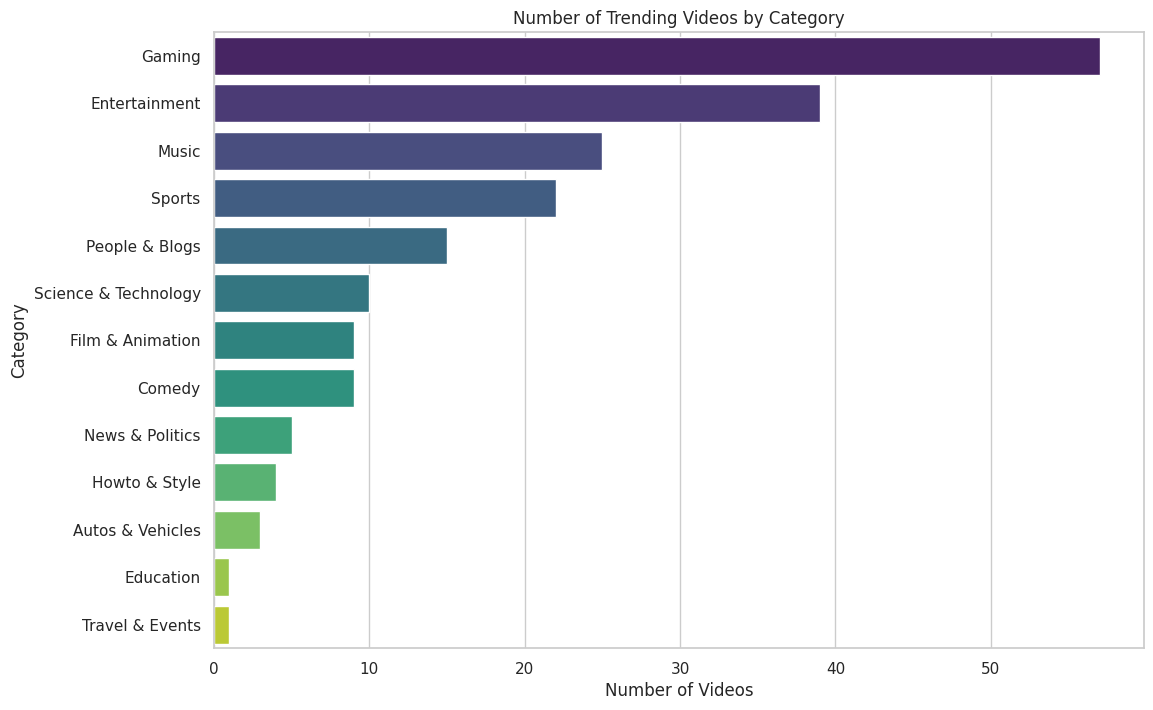

In [ ]:
#analyzing the no. of trending videos by category
trending_videos_df['category_name']= trending_videos_df['category_id'].map(category_mapping)

#bar chart for category counts
plt.figure(figsize=(12,8))
sns.countplot(y=trending_videos_df['category_name'], order = trending_videos_df['category_name'].value_counts().index, palette='viridis')

plt.title('Number of Trending Videos by Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

*The bar chart shows that the Gaming, Entertainment, Music, and sports categories have the highest number of trending videos.*

<ipython-input-38-1e1c56119df2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
<ipython-input-38-1e1c56119df2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
<ipython-input-38-1e1c56119df2>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis')


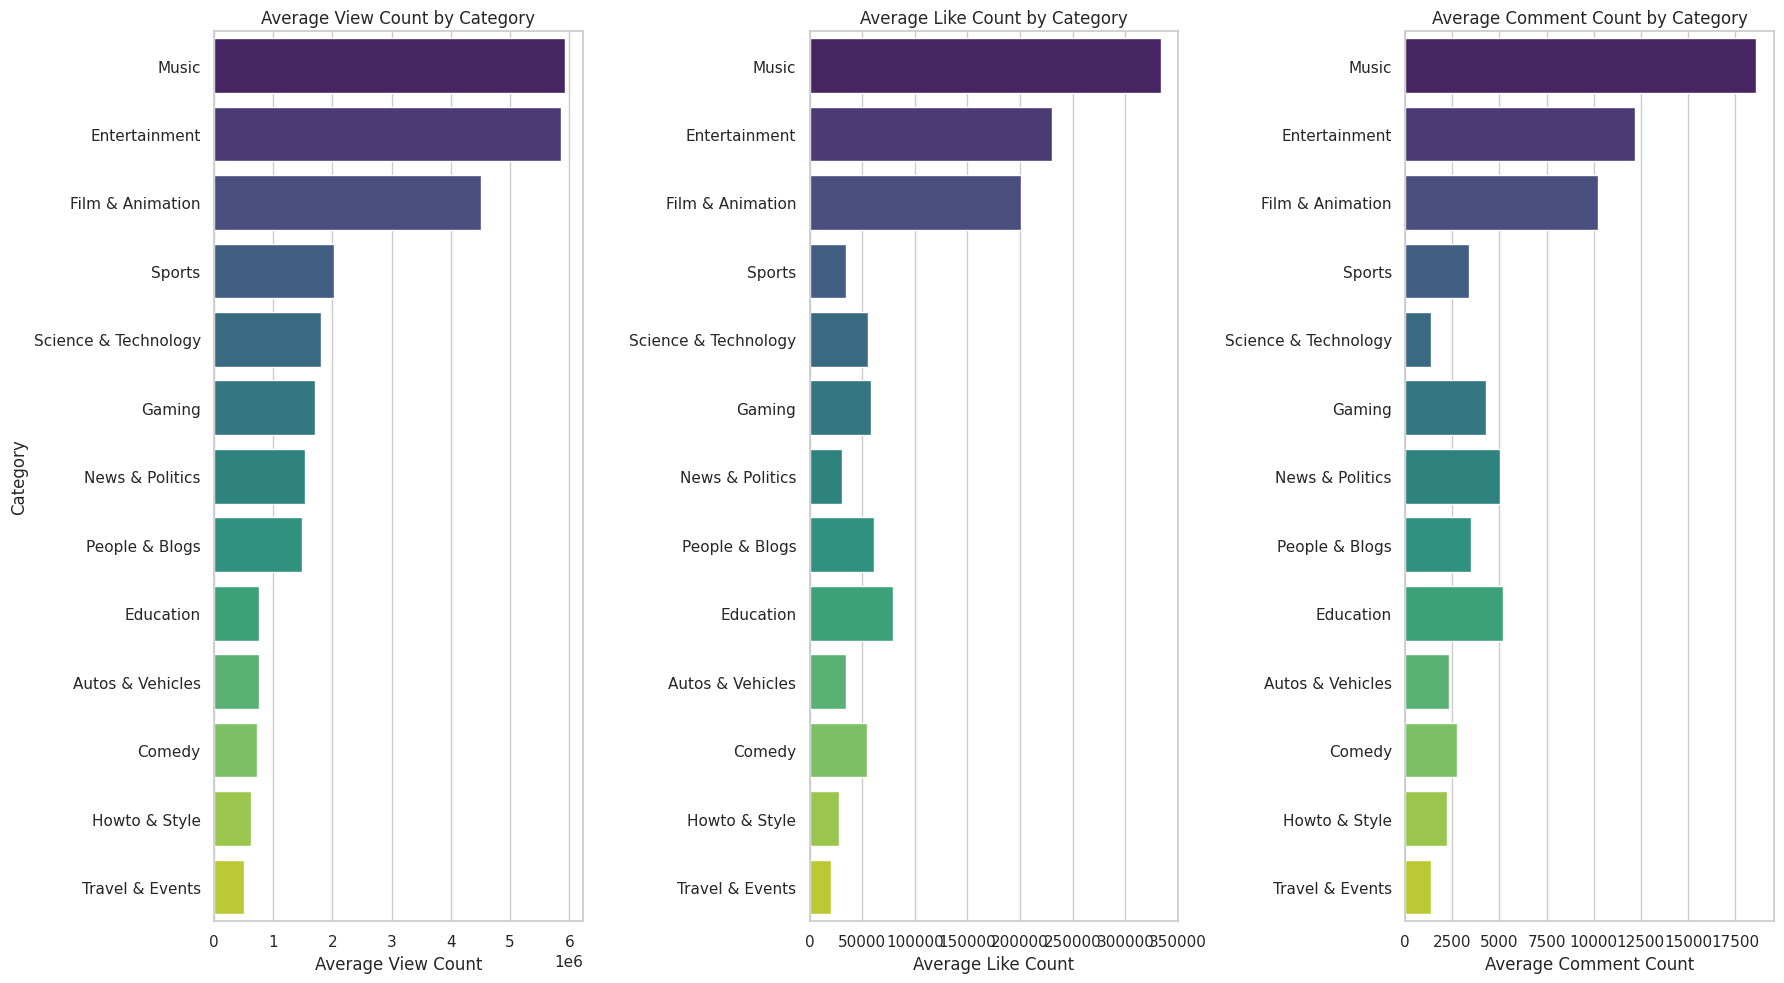

In [ ]:
# average engagement metrics by category
category_engagement = trending_videos_df.groupby('category_name')[['view_count', 'like_count', 'comment_count']].mean().sort_values(by='view_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 10))

# view count by category
sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
axes[0].set_title('Average View Count by Category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Category')

# like count by category
sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
axes[1].set_title('Average Like Count by Category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by category
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis')
axes[2].set_title('Average Comment Count by Category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

*Music and entertainment categories have the highest average view counts, likes, and comments.*

In [ ]:
!pip install isodate
import isodate

# convert ISO 8601 duration to seconds
trending_videos_df['duration_seconds'] = trending_videos_df['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

trending_videos_df['duration_range'] = pd.cut(trending_videos_df['duration_seconds'], bins=[0, 300, 600, 1200, 3600, 7200], labels=['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min'])

*In the above code, we are using the isodate library to convert the duration of each video from the ISO 8601 format to seconds, which allows for numerical analysis. After converting the durations, we are categorizing the videos into different duration ranges (0-5 minutes, 5-10 minutes, 10-20 minutes, 20-60 minutes, and 60-120 minutes) by creating a new column called duration_range. This categorization enables us to analyze and compare the engagement metrics of videos within specific length intervals, providing insights into how video length influences viewer behaviour and video performance.*

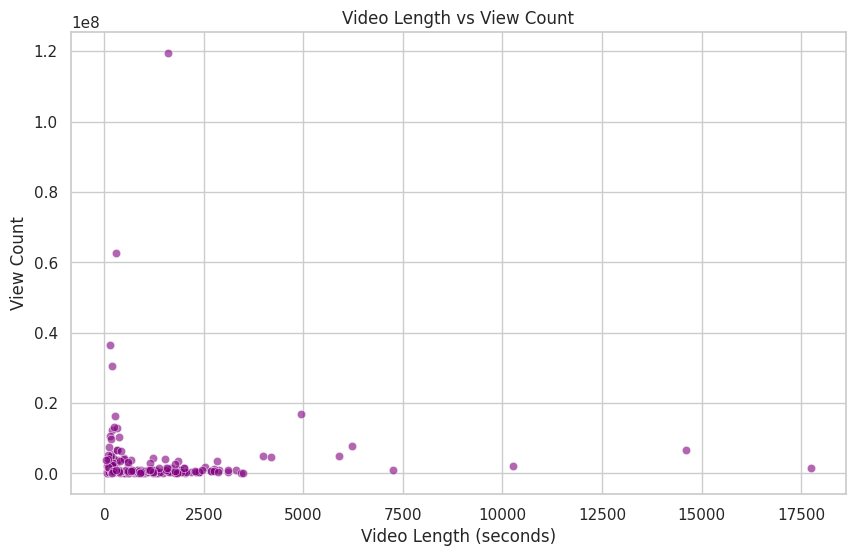

<ipython-input-45-bb558beab9af>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
<ipython-input-45-bb558beab9af>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_engagement.index, x=length_engagement['like_count'], ax=axes[1], palette='magma')
<ipython-input-45-bb558beab9af>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_engagement.index, x=length_engagement['comment_count'], ax=axes[2], palette='magma')


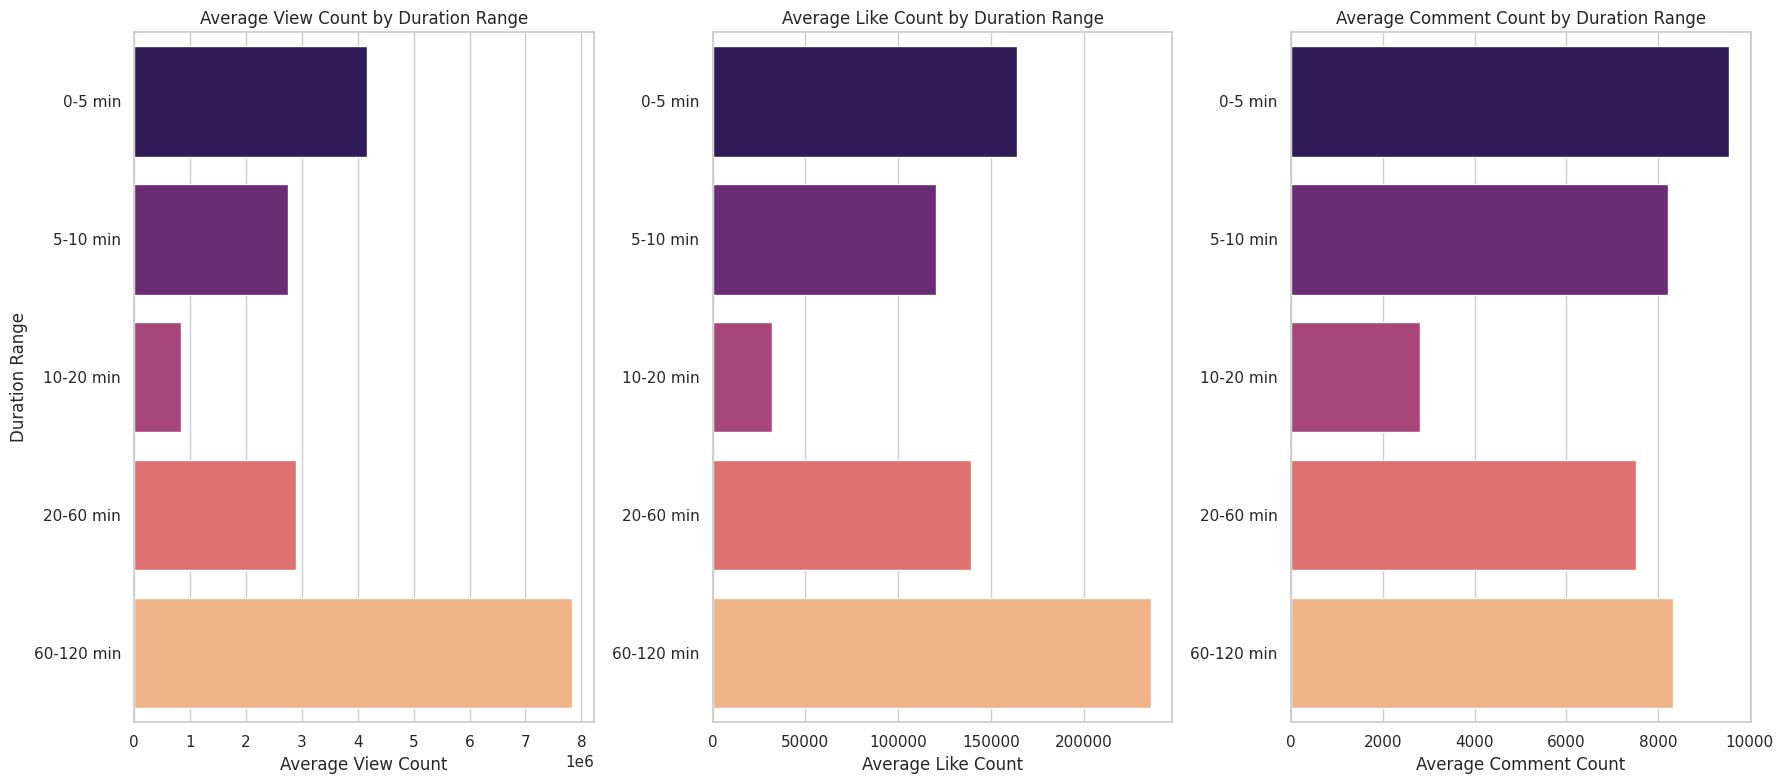

In [ ]:
#now we will analyze the content and duration of videos

# scatter plot for video length vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_seconds', y='view_count', data=trending_videos_df, alpha=0.6, color='purple')
plt.title('Video Length vs View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')
plt.show()

# bar chart for engagement metrics by duration range
length_engagement = trending_videos_df.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# view count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
axes[0].set_title('Average View Count by Duration Range')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Duration Range')

# like count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['like_count'], ax=axes[1], palette='magma')
axes[1].set_title('Average Like Count by Duration Range')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['comment_count'], ax=axes[2], palette='magma')
axes[2].set_title('Average Comment Count by Duration Range')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

*The scatter plot shows a positive correlation between video length and view count. This indicates that longer videos tend to have more views on average. However, there is also a lot of variation in view counts across videos of different lengths. Some short videos have very high view counts, while some long videos have relatively low view counts. This suggests that video length is not the only factor that determines a video's popularity. Other factors, such as content quality, topic, and promotion, also play a significant role. Additionally, there appears to be a cluster of videos with very high view counts and durations of around 10-20 minutes. This could potentially represent a specific type of content or format that is particularly popular with viewers. Further analysis would be needed to explore this observation in more detail.*


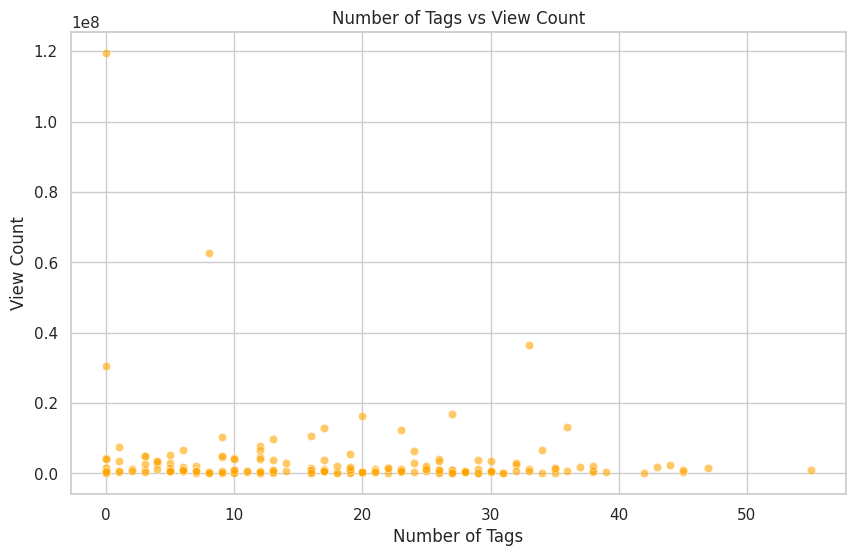

In [ ]:
#analyze the relationship between views and number of tags used in the video

# calculate the number of tags for each video
trending_videos_df['tag_count'] = trending_videos_df['tags'].apply(len)

# scatter plot for number of tags vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tag_count', y='view_count', data=trending_videos_df, alpha=0.6, color='orange')
plt.title('Number of Tags vs View Count')
plt.xlabel('Number of Tags')
plt.ylabel('View Count')
plt.show()


*The scatter plot shows a very weak relationship between the number of tags and view count, suggesting that the number of tags has minimal impact on a video’s view count.*

<ipython-input-48-54693755df89>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=trending_videos_df, palette='coolwarm')


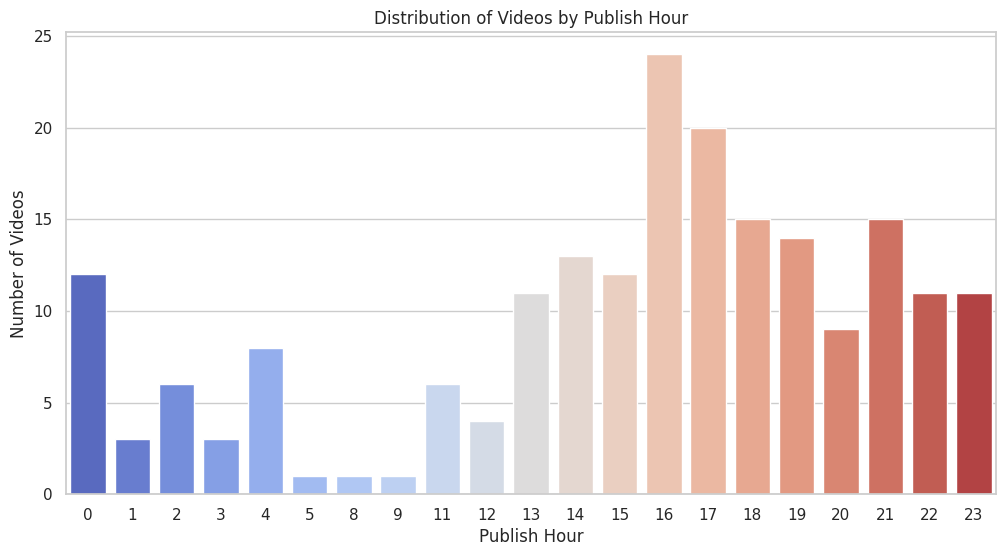

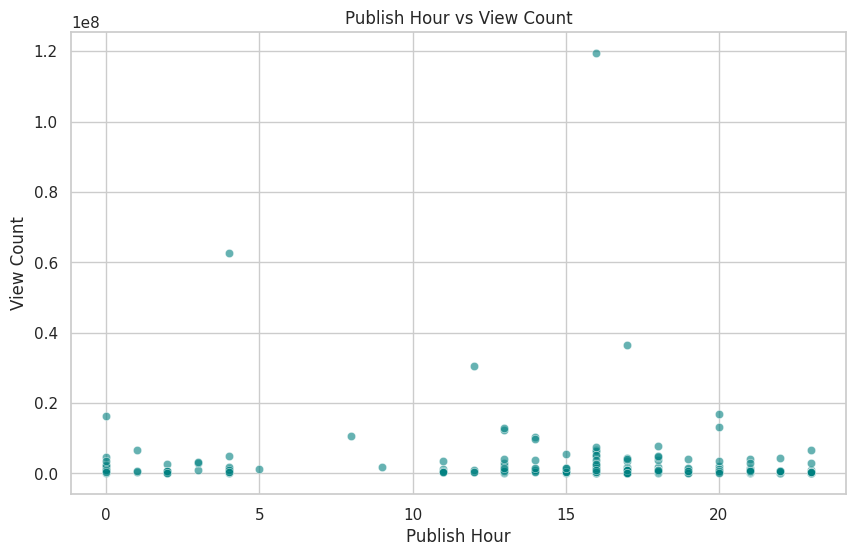

In [ ]:
#impact of the time a video is posted on its views

# extract hour of publication
trending_videos_df['publish_hour'] = trending_videos_df['published_at'].dt.hour

# bar chart for publish hour distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='publish_hour', data=trending_videos_df, palette='coolwarm')
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of Videos')
plt.show()

# scatter plot for publish hour vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publish_hour', y='view_count', data=trending_videos_df, alpha=0.6, color='teal')
plt.title('Publish Hour vs View Count')
plt.xlabel('Publish Hour')
plt.ylabel('View Count')
plt.show()


*The distribution shows that most videos are published between 16:00 and 21:00 hours (4 PM - 10 PM) , indicating this may be an optimal time for uploading videos. There is a very weak negative relationship between publish hour and view count, suggesting that the hour of publication has minimal impact on engagement metrics.*

**Conclusion on what makes a video trend on YT:**
1. Encourage viewers to like and comment on videos to boost engagement metrics.
2. Aim to create longer videos for higher engagemnet, especially for categories like Entertainment and Music.
3. Schedule video uploads around peak times (4 PM – 10 PM) to maximize initial views and engagement.